In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from pyswarms.single import GlobalBestPSO
from pyswarms.utils.plotters.formatters import Mesher
from pyswarms.utils.plotters import plot_contour
import itertools
from mpl_toolkits.mplot3d import Axes3D

In [36]:
# Define the objective functions
def three_hump_camel(position):
    x, y = position[:, 0], position[:, 1]
    return 2 * x**2 - 1.05 * x**4 + (x**6) / 6 + x * y + y**2

def easom(position):
    x, y = position[:, 0], position[:, 1]
    return -np.cos(x) * np.cos(y) * np.exp(-(x - np.pi)**2 - (y - np.pi)**2)

def booth(position):
    x, y = position[:, 0], position[:, 1]
    return (x + 2 * y - 7)**2 + (2 * x + y - 5)**2

def rosenbrock(position):
    x, y = position[:, 0], position[:, 1]
    return (1 - x)**2 + 100 * (y - x**2)**2


functions = [booth, rosenbrock, easom, three_hump_camel]
function_names = ["Booth", "Rosenbrock", "Easom", "3-Hump Camel"]

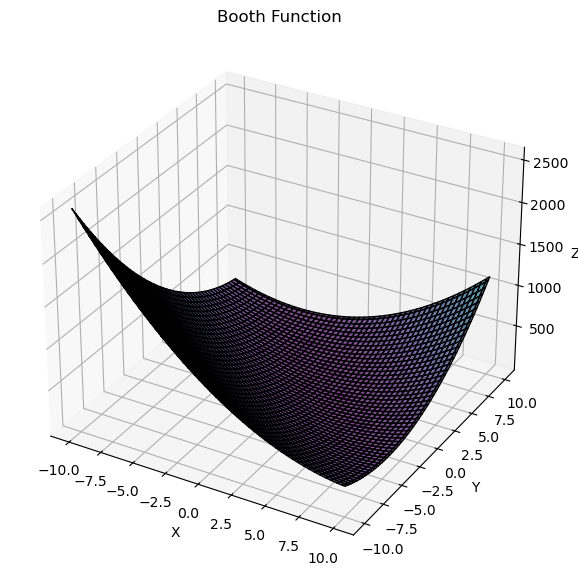

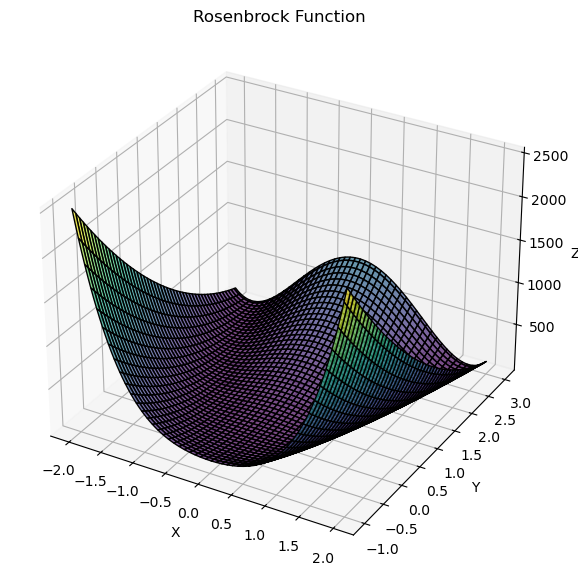

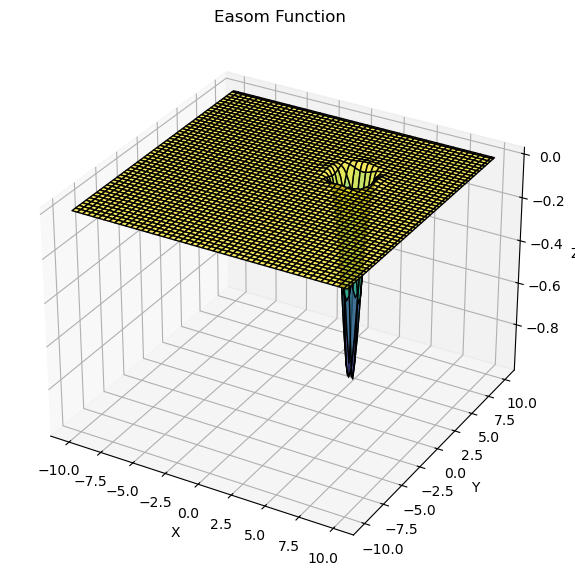

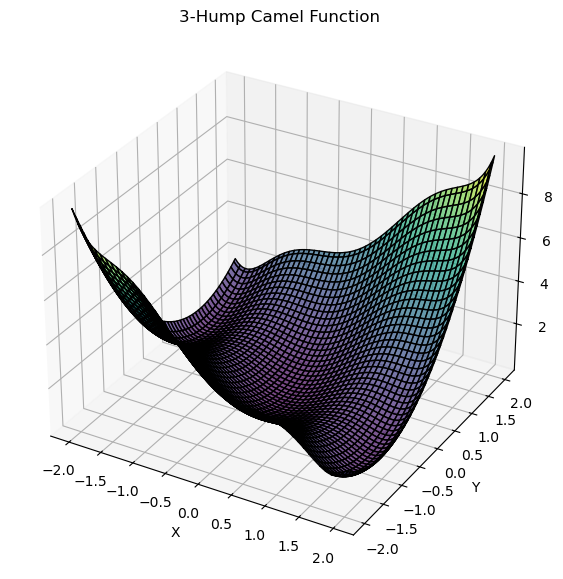

In [39]:
def plot_function_surface(func, func_name, x_range=(-10, 10), y_range=(-10, 10), resolution=100):
    x = np.linspace(*x_range, resolution)
    y = np.linspace(*y_range, resolution)
    X, Y = np.meshgrid(x, y)
    positions = np.column_stack([X.ravel(), Y.ravel()])  # Flatten X, Y to pass as positions
    
    Z = func(positions).reshape(X.shape)  # Reshape the output to match X, Y grid

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.7)
    ax.set_title(f'{func_name} Function')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.savefig(f'plots/{func_name}_viz.png')
    plt.show()

# Plot each function with ranges suited to each function's properties
plot_ranges = [((-10, 10), (-10, 10)),  # Booth
               ((-2, 2), (-1, 3)),      # Rosenbrock
               ((-10, 10), (-10, 10)),  # Easom
               ((-2, 2), (-2, 2))]      # 3-Hump Camel

for func, func_name, plot_range in zip(functions, function_names, plot_ranges):
    plot_function_surface(func, func_name, *plot_range, resolution=100)

In [97]:
# Define the parameter grid
c1_values = [round(i, 1) for i in np.arange(0.2, 1.1, 0.2)]
c2_values = [round(i, 1) for i in np.arange(0.2, 1.1, 0.2)]
w_values = [round(i, 1) for i in np.arange(0.2, 1.1, 0.2)]
num_iter_values = [50, 100, 250, 500]
num_particles_values = [50, 100, 250, 500]

# Bounds for the PSO search space
bounds = ([-10, -10], [10, 10])

# Initialize list to store the results
results = []

# Run PSO for each combination of parameters using itertools.product
for i, func in enumerate(functions):
    for (c1, c2, w, num_iters, num_particles) in itertools.product(c1_values, c2_values, w_values, num_iter_values, num_particles_values):
        # Define the options with the current set of parameters
        options = {'c1': c1, 'c2': c2, 'w': w}
        
        # Initialize the PSO optimizer
        optimizer = GlobalBestPSO(n_particles=num_particles, dimensions=2, options=options, bounds=bounds)
        
        # Run the optimizer and capture the best cost
        cost, pos = optimizer.optimize(func, iters=num_iters, verbose=False)
        
        # Store the configuration and corresponding cost
        results.append({
            "function": function_names[i],
            "c1": c1,
            "c2": c2,
            "w": w,
            "iterations": num_iters,
            "particles": num_particles,
            "best_cost": cost
        })

        # Output the results for this run
        print(f"Function: {function_names[i]}, Config (c1={c1}, c2={c2}, w={w}, iters={num_iters}, particles={num_particles}) -> Best Cost: {cost}")

# Find the best configuration per function
for func_name in function_names:
    func_results = [res for res in results if res["function"] == func_name]
    best_result = min(func_results, key=lambda x: x["best_cost"])
    
    print(f"\nBest configuration for {func_name}:")
    print(f"c1 = {best_result['c1']}, c2 = {best_result['c2']}, w = {best_result['w']}, "
          f"iterations = {best_result['iterations']}, particles = {best_result['particles']}")
    print(f"Best cost: {best_result['best_cost']}")

Function: Booth, Config (c1=0.2, c2=0.2, w=0.2, iters=50, particles=50) -> Best Cost: 1.4738627255394466e-05
Function: Booth, Config (c1=0.2, c2=0.2, w=0.2, iters=50, particles=100) -> Best Cost: 7.537141592978161e-06
Function: Booth, Config (c1=0.2, c2=0.2, w=0.2, iters=50, particles=250) -> Best Cost: 2.2362317209453148e-06
Function: Booth, Config (c1=0.2, c2=0.2, w=0.2, iters=50, particles=500) -> Best Cost: 8.028929416612628e-07
Function: Booth, Config (c1=0.2, c2=0.2, w=0.2, iters=100, particles=50) -> Best Cost: 2.0533180506461826e-05
Function: Booth, Config (c1=0.2, c2=0.2, w=0.2, iters=100, particles=100) -> Best Cost: 2.732005643580705e-13
Function: Booth, Config (c1=0.2, c2=0.2, w=0.2, iters=100, particles=250) -> Best Cost: 6.663684302494933e-13
Function: Booth, Config (c1=0.2, c2=0.2, w=0.2, iters=100, particles=500) -> Best Cost: 8.029242340346046e-13
Function: Booth, Config (c1=0.2, c2=0.2, w=0.2, iters=250, particles=50) -> Best Cost: 7.888609052210118e-31
Function: Boot

In [98]:
import pandas as pd
df = pd.DataFrame(results)
df = df[df['w'] == 0.2]
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 0 to 7935
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   function    1600 non-null   object 
 1   c1          1600 non-null   float64
 2   c2          1600 non-null   float64
 3   w           1600 non-null   float64
 4   iterations  1600 non-null   int64  
 5   particles   1600 non-null   int64  
 6   best_cost   1600 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 100.0+ KB
None
  function   c1   c2    w  iterations  particles     best_cost
0    Booth  0.2  0.2  0.2          50         50  1.473863e-05
1    Booth  0.2  0.2  0.2          50        100  7.537142e-06
2    Booth  0.2  0.2  0.2          50        250  2.236232e-06
3    Booth  0.2  0.2  0.2          50        500  8.028929e-07
4    Booth  0.2  0.2  0.2         100         50  2.053318e-05


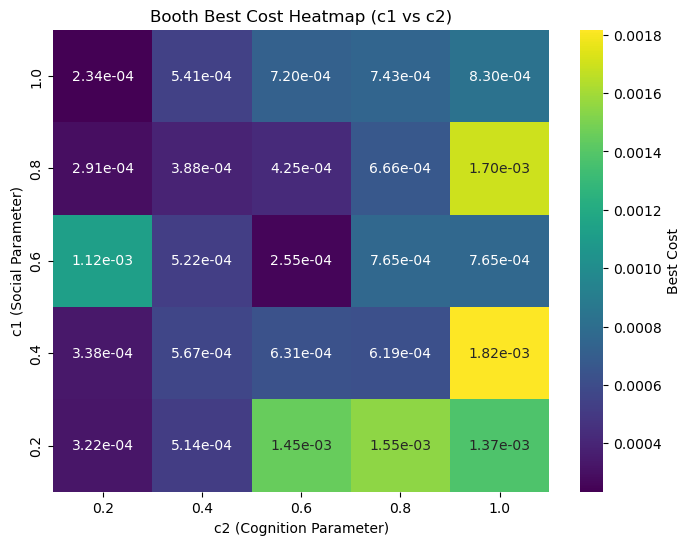

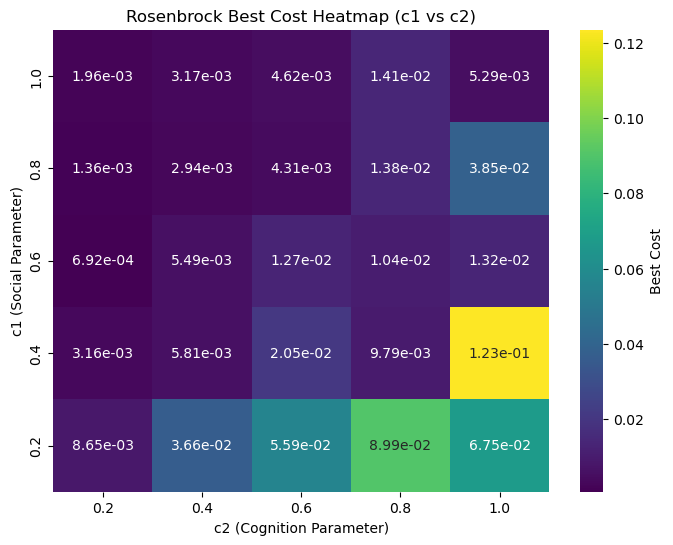

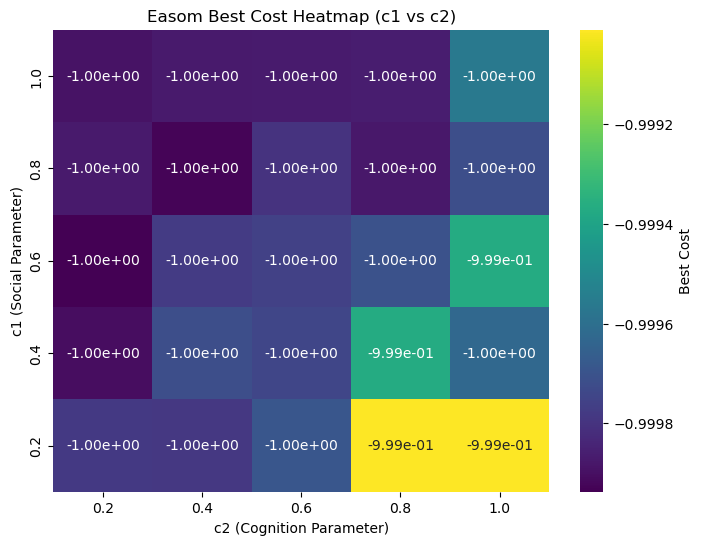

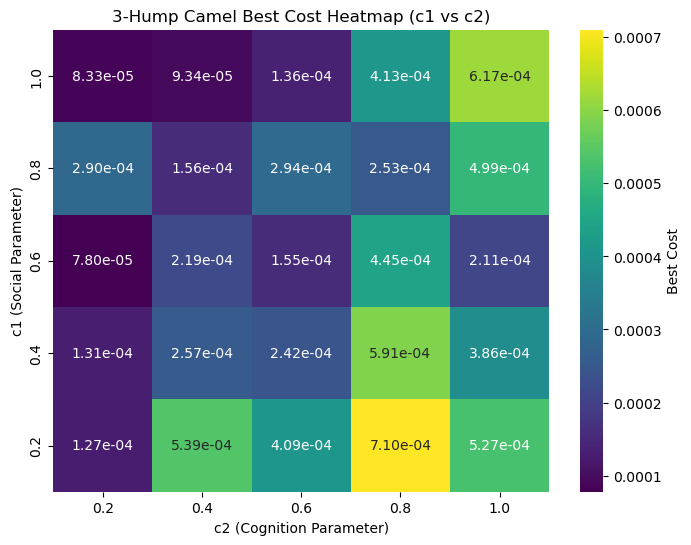

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert results to a DataFrame
df_results = pd.DataFrame(results)

# Create a heatmap for each function
for func_name in function_names:
    # Filter results for the specific function
    func_df = df_results[df_results['function'] == func_name]
    
    # Pivot the DataFrame to have c1 and c2 as indices and best_cost as values
    heatmap_data = func_df.pivot_table(values='best_cost', index='c1', columns='c2')
    heatmap_data = heatmap_data[::-1]

    # Plotting the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.2e', cbar_kws={'label': 'Best Cost'})
    plt.title(f"{func_name} Best Cost Heatmap (c1 vs c2)")
    plt.xlabel('c2 (Cognition Parameter)')
    plt.ylabel('c1 (Social Parameter)')
    plt.savefig(f'plots/{func_name}_heatmap_c1_c2.png')
    plt.show()

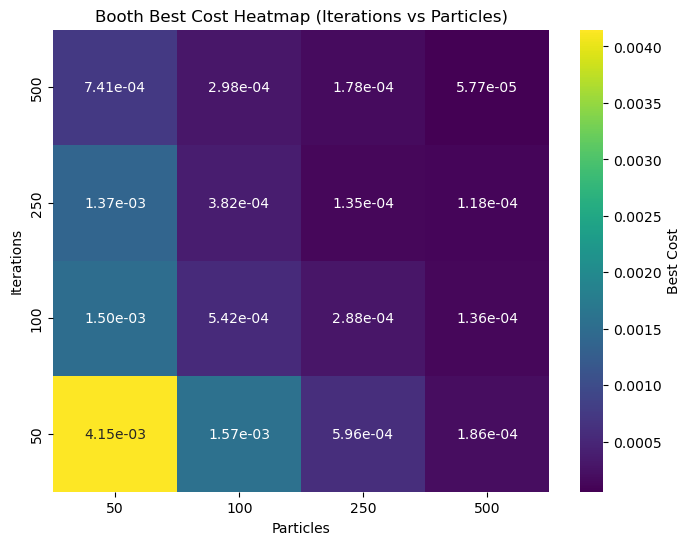

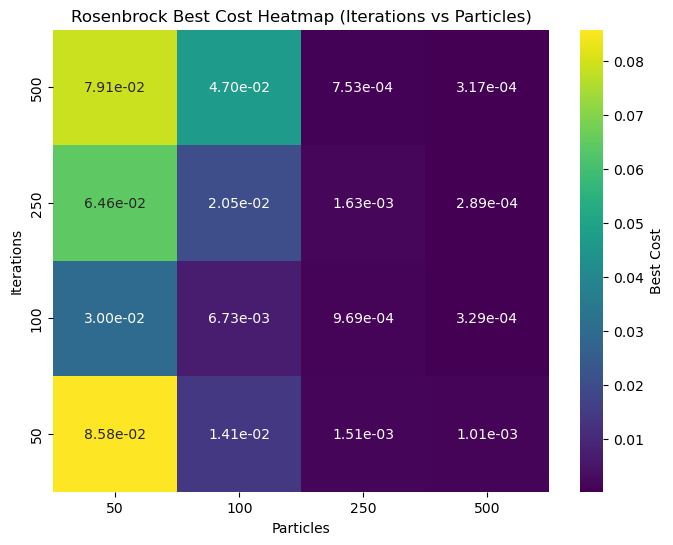

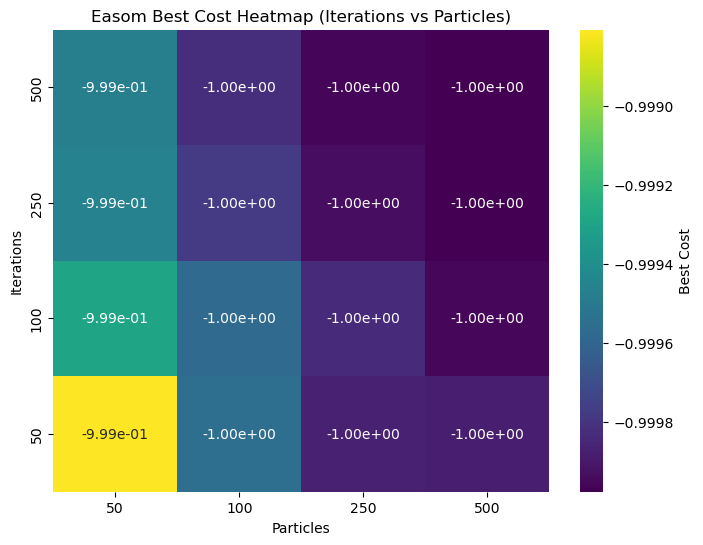

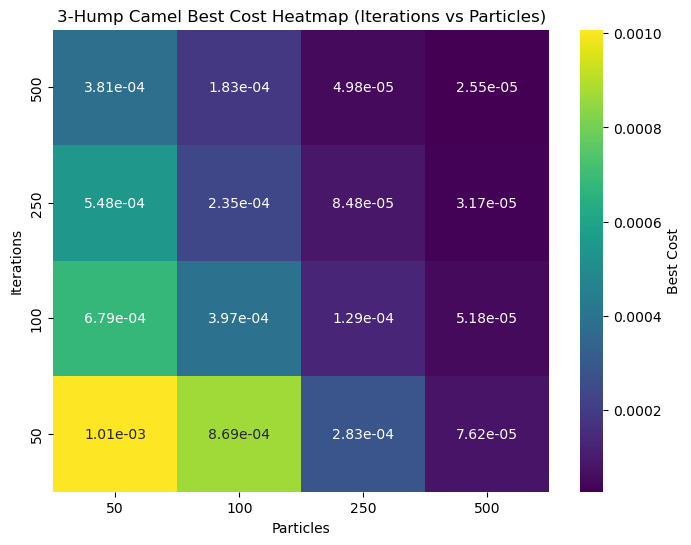

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert results to a DataFrame
df_results = pd.DataFrame(results)

# Create a heatmap for each function
for func_name in function_names:
    # Filter results for the specific function
    func_df = df_results[df_results['function'] == func_name]
    
    # Pivot the DataFrame to have c1 and c2 as indices and best_cost as values
    heatmap_data = func_df.pivot_table(values='best_cost', index='iterations', columns='particles')
    heatmap_data = heatmap_data[::-1]

    # Plotting the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.2e', cbar_kws={'label': 'Best Cost'})
    plt.title(f"{func_name} Best Cost Heatmap (Iterations vs Particles)")
    plt.xlabel('Particles')
    plt.ylabel('Iterations')
    plt.savefig(f'plots/{func_name}_heatmap_iter_part.png')
    plt.show()